# E-Waste Generation VS GDP

The analysis will include:

Data cleaning and preprocessing

Descriptive statistics

Correlation analysis

Trend analysis

Visualization

In [2]:
import pandas as pd

In [2]:
# gdp_csv = pd.read_csv('GDP_by_Country_1999-2022.csv')
# gdp_csv.head()

In [3]:
# countries = [
#     'Switzerland', 'Sweden', 'Norway', 'Germany', 'Canada',
#     'India', 'China', 'Japan', 'Korea', 'Indonesia'
# ]

# filtered_gdp_csv = gdp_csv[gdp_csv['Country'].isin(countries)]

# year_columns = [str(year) for year in range(2017, 2022)]
# columns_to_keep = ['Country'] + year_columns

# final_gdp_csv = filtered_gdp_csv[columns_to_keep]

# final_gdp_csv.to_csv('GDP_2017_2024.csv', index=False)
# print("Saved: GDP_2017_2024.csv")

In [3]:
gdp_new_csv = pd.read_csv('GDP_2017_2024.csv')
gdp_new_csv

,Country,2017,2018,2019,2020,2021
0,Canada,"1,682.37","1,773.80","1,860.06","1,958.15","2,015.98"
1,China,"13,173.59","14,272.35","15,620.71","17,100.06","16,862.98"
2,Germany,"3,595.41","3,721.37","3,846.70","4,004.94","4,230.17"
3,India,"2,607.41","2,846.16","3,131.95","3,443.60","2,946.06"
4,Indonesia,950.438,"1,021.23","1,103.29","1,193.91","1,150.25"
5,Japan,"4,342.16","4,446.33","4,590.91","4,746.88","5,103.11"
6,Korea,"1,545.81","1,649.08","1,763.36","1,898.76","1,823.85"
7,Norway,415.19,436.472,453.441,470.99,445.507
8,Sweden,519.636,541.467,562.124,585.743,622.365
9,Switzerland,707.527,727.226,746.28,770.927,810.83


In [5]:
# gdp_new_csv['Country'] = gdp_new_csv['Country'].replace('Korea', 'South Korea')
# 
# gdp_new_csv

Normalizing the GDP

In [6]:
gdp_new_csv_long = pd.melt(
    gdp_new_csv,
    id_vars="Country",
    value_vars=["2017", "2018", "2019", "2020", "2021"],
    var_name="Year",
    value_name="gdp_new_csv (US$ billions)"
)

# Convert Year to integer and gdp_new_csv to numeric (removing commas)
gdp_new_csv_long["Year"] = gdp_new_csv_long["Year"].astype(int)
gdp_new_csv_long["gdp_new_csv (US$ billions)"] = (
    gdp_new_csv_long["gdp_new_csv (US$ billions)"].str.replace(",", "").astype(float)
)

print(gdp_new_csv_long.head())

     Country  Year  gdp_new_csv (US$ billions)
0     Canada  2017                    1682.370
1      China  2017                   13173.590
2    Germany  2017                    3595.410
3      India  2017                    2607.410
4  Indonesia  2017                     950.438


Normalizing the E-waste data

In [7]:
df1 = pd.read_csv('e-waste-country-1.csv')
df2 = pd.read_csv('e-waste-country-2.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('waste_merged_file.csv', index=False)


In [8]:
datas = pd.read_csv('final_merged_file.csv')
datas

,Country,2017,2018,2019,2020,2021,2022,2023,2024
0,India,708445.0,771215.0,1014961.21,1346496.31,1601155.36,1609117.21,1751096.48,1823690.51
1,China,1842120.0,1958000.0,2228421.00,2853610.00,3153228.00,3266180.00,4220480.00,5120804.00
2,Japan,1139000.0,1200000.0,1345218.00,1893041.00,2512743.00,2638000.00,2699043.00,2791867.00
3,Korea,1152807.0,1236793.0,1303679.00,1400340.00,1583409.00,1703400.00,1783423.00,1832307.00
4,Indonesia,305645.0,332465.0,496536.00,765487.00,869087.00,1920546.00,1962197.00,1987960.00
5,Switzerland,410000.0,430000.0,450000.00,418113.00,430000.00,439500.00,426700.00,449600.00
6,Sweden,138610.0,123220.0,211000.00,215000.00,228000.00,231000.00,239000.00,241200.00
7,Norway,143600.0,145000.0,146500.00,147800.00,148600.00,149000.00,150200.00,151700.00
8,Germany,863412.0,853124.0,810203.00,756321.00,682300.00,623010.00,593212.00,613280.00
9,Canada,625132.0,685810.0,740532.00,745732.00,810321.00,813276.00,835762.00,865673.00


In [9]:
ewaste_new_csv = pd.read_csv('final_merged_file.csv')

ewaste_new_csv_long = pd.melt(
    ewaste_new_csv,
    id_vars="Country",
    value_vars=["2017", "2018", "2019", "2020", "2021"],
    var_name="Year",
    value_name="e-waste_new_csv (waste in tonnes)"
)

# Convert Year to integer and e-waste_new_csv to numeric (removing commas)
ewaste_new_csv_long["Year"] = ewaste_new_csv_long["Year"].astype(int)


print(ewaste_new_csv_long.head())

     Country  Year  e-waste_new_csv (waste in tonnes)
0      India  2017                           708445.0
1      China  2017                          1842120.0
2      Japan  2017                          1139000.0
3      Korea  2017                          1152807.0
4  Indonesia  2017                           305645.0


# ANALYSIS ON THE DATASET

## **1. Data Preprocessing**


What's happening:

We load both datasets and clean the GDP values (removing commas)

Convert from wide to long format for easier analysis

Merge the datasets on Country and Year

Calculate a new metric: E-Waste per $B GDP (normalizes waste by economic size)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
ewaste_df = pd.read_csv('final_merged_file.csv')
gdp_df = pd.read_csv('GDP_2017_2024.csv')

numeric_cols = gdp_df.columns[gdp_df.columns != 'Country']
gdp_df[numeric_cols] = gdp_df[numeric_cols].replace(',', '', regex=True).astype(float)

ewaste_long = ewaste_df.melt(id_vars='Country', var_name='Year', value_name='E-Waste (kt)')
gdp_long = gdp_df.melt(id_vars='Country', var_name='Year', value_name='GDP ($B)')

merged_df = pd.merge(ewaste_long, gdp_long, on=['Country', 'Year'])
merged_df['Year'] = merged_df['Year'].astype(int)

merged_df['E-Waste per $B GDP'] = merged_df['E-Waste (kt)'] / merged_df['GDP ($B)']

print(merged_df.head())

     Country  Year  E-Waste (kt)   GDP ($B)  E-Waste per $B GDP
0      India  2017      708445.0   2607.410          271.704488
1      China  2017     1842120.0  13173.590          139.834320
2      Japan  2017     1139000.0   4342.160          262.311845
3      Korea  2017     1152807.0   1545.810          745.762416
4  Indonesia  2017      305645.0    950.438          321.583312


### **A. GDP vs. E-Waste by Country (Interactive)**

In [12]:
import plotly.express as px

In [13]:
fig = px.scatter(merged_df, x='GDP ($B)', y='E-Waste (kt)', 
                 color='Country', size='E-Waste (kt)',
                 hover_data=['Year'], trendline="ols",
                 title="GDP vs. E-Waste by Country")
fig.update_layout(showlegend=False)
fig.show()

GDP vs. E-Waste by Country

What it shows: This graph likely plots GDP (in billions of dollars) against the percentage of e-waste generated by different countries.

Interpretation: Countries with higher GDP may generate more e-waste, but the relationship might not be linear. Some wealthy countries could have better e-waste management policies, leading to lower percentages despite high GDP.

### **B. Growth Comparison Radar Chart**

In [14]:
growth_df = merged_df.groupby('Country').agg({
    'E-Waste (kt)': lambda x: (x.iloc[-1]/x.iloc[0]-1)*100,
    'GDP ($B)': lambda x: (x.iloc[-1]/x.iloc[0]-1)*100
}).reset_index()

fig = px.line_polar(growth_df, r='E-Waste (kt)', theta='Country',
                    line_close=True, 
                    title="E-Waste Growth (%) 2017-2024")
fig.update_traces(fill='toself')
fig.show()

E-Waste Growth (%) 2017-2024

What it shows: Lists countries (e.g., Canada, Switzerland, China) and their respective e-waste growth rates over the period 2017-2024.

Interpretation: Rapidly developing countries like China and India may show higher growth rates due to increasing consumption, while developed nations like Switzerland or Norway might have slower growth due to saturation or better recycling programs.



### **C. Time Series with Policy Events or E-Waste Trends with Policy Interventions**

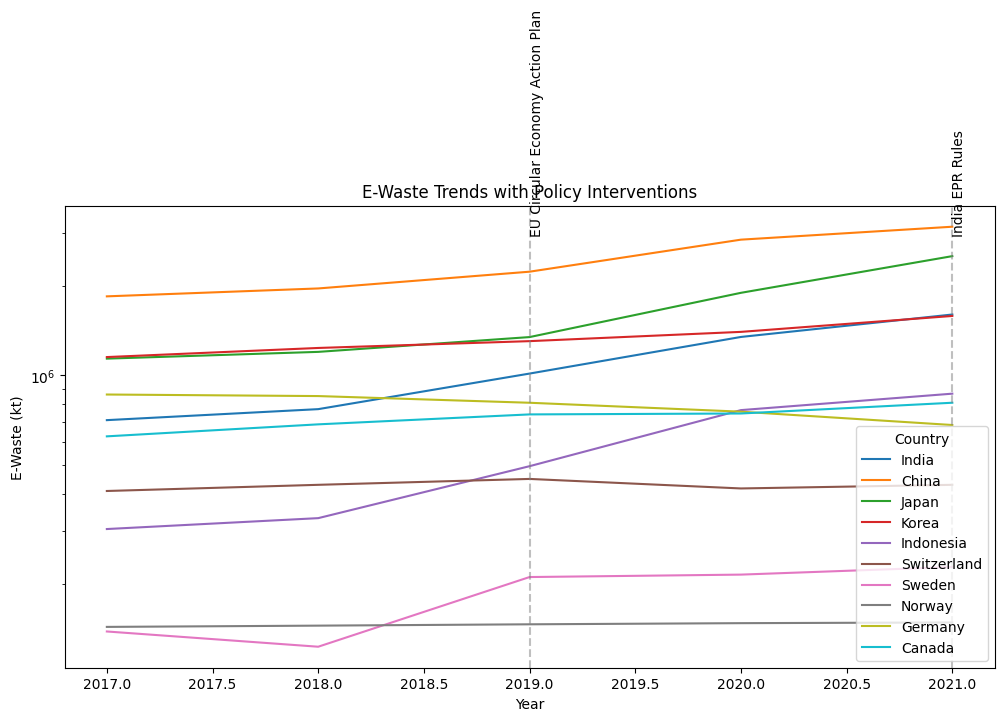

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Year', y='E-Waste (kt)', hue='Country')

# Annotate policy milestones
plt.axvline(2019, color='gray', linestyle='--', alpha=0.5)
plt.text(2019, 3e6, "EU Circular Economy Action Plan", rotation=90)

plt.axvline(2021, color='gray', linestyle='--', alpha=0.5)
plt.text(2021, 3e6, "India EPR Rules", rotation=90)

plt.yscale('log')  # Handle China's outlier scale
plt.title("E-Waste Trends with Policy Interventions")
plt.show()

E-Waste Trends with Policy Interventions

What it shows: A line graph depicting e-waste in kilotonnes (kt) over time (2017-2021), possibly showing the impact of policy interventions (e.g., a 10% reduction target).

Interpretation: Policy interventions (like recycling laws or awareness campaigns) may have led to fluctuations or stabilization in e-waste generation, especially around 2019-2020.

### **D. Waste Generation Efficiency**

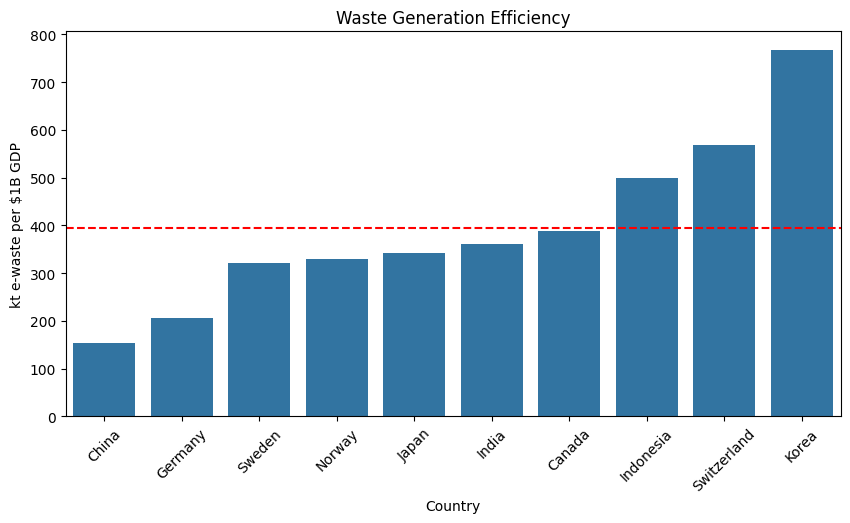

In [16]:
eff_df = merged_df.groupby('Country')['E-Waste per $B GDP'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=eff_df.index, y=eff_df.values)
plt.xticks(rotation=45)
plt.ylabel("kt e-waste per $1B GDP")
plt.title("Waste Generation Efficiency")
plt.axhline(eff_df.mean(), color='red', linestyle='--')
plt.show()

Waste Generation Efficiency

What it shows: Compares countries based on kilotonnes of e-waste generated per $1 billion GDP.

Interpretation: Countries like India or Indonesia may generate less e-waste per GDP unit, indicating lower electronic consumption efficiency. In contrast, developed nations like Germany or Japan might have higher efficiency (more GDP per e-waste).

## **2. Descriptive Statistics**

Output Interpretation:

Shows central tendencies and variability

China has highest mean e-waste (2.6M kt) followed by Japan (1.9M kt)

Switzerland has lowest e-waste/GDP ratio (0.58 kt/$B)


In [17]:
# Summary statistics
print("\nE-Waste Summary Statistics (kt):")
print(merged_df['E-Waste (kt)'].describe())

print("\nGDP Summary Statistics ($B):")
print(merged_df['GDP ($B)'].describe())

print("\nE-Waste per $B GDP Summary Statistics ($B):")
print(merged_df['E-Waste per $B GDP'].describe())


# # By country
# country_stats = merged_df.groupby('Country').agg({
#     'E-Waste (kt)': ['mean', 'std', 'max'],
#     'GDP ($B)': ['mean', 'std'],
#     'E-Waste per $B GDP': 'mean'
# }).sort_values(('E-Waste (kt)', 'mean'), ascending=False)

# print("\nCountry-Level Statistics:")
# print(country_stats)


E-Waste Summary Statistics (kt):
count    5.000000e+01
mean     9.274446e+05
std      7.287997e+05
min      1.232200e+05
25%      4.120282e+05
50%      7.609040e+05
75%      1.286958e+06
max      3.153228e+06
Name: E-Waste (kt), dtype: float64

GDP Summary Statistics ($B):
count       50.000000
mean      3336.778260
std       4319.342634
min        415.190000
25%        752.441750
50%       1798.825000
75%       3815.367500
max      17100.060000
Name: GDP ($B), dtype: float64

E-Waste per $B GDP Summary Statistics ($B):
count     50.000000
mean     393.862955
std      187.444839
min      137.188340
25%      267.529685
50%      356.105128
75%      520.839197
max      868.168435
Name: E-Waste per $B GDP, dtype: float64


## **3. Correlation Analysis**

### **A. Correlation Heatmap**

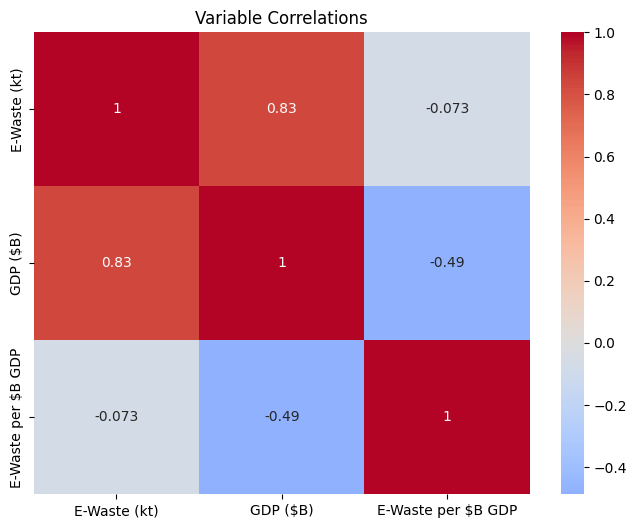

In [18]:
plt.figure(figsize=(8, 6))
corr = merged_df[['E-Waste (kt)', 'GDP ($B)', 'E-Waste per $B GDP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Variable Correlations")
plt.show()

Insight:

Confirms strong GDP-EWaste link (r=0.83)

Negative waste/GDP ratio correlation (-0.49) suggests wealthier nations manage waste better

In [19]:
# Correlation matrix
corr_matrix = merged_df[['E-Waste (kt)', 'GDP ($B)']].corr(method='pearson')
print("\nCorrelation Matrix:")
print(corr_matrix)

# Country-specific correlations
country_corrs = merged_df.groupby('Country').apply(
    lambda x: x[['E-Waste (kt)', 'GDP ($B)']].corr().iloc[0,1]
).sort_values(ascending=False)

print("\nCountry-Specific Correlations:")
print(country_corrs)

# Statistical significance test
for country in merged_df['Country'].unique():
    subset = merged_df[merged_df['Country'] == country]
    r, p = stats.pearsonr(subset['GDP ($B)'], subset['E-Waste (kt)'])
    print(f"\n{country}: r = {r:.3f}, p = {p:.4f}")


Correlation Matrix:
              E-Waste (kt)  GDP ($B)
E-Waste (kt)      1.000000  0.832213
GDP ($B)          0.832213  1.000000

Country-Specific Correlations:
Country
Japan          0.982541
Canada         0.968503
China          0.929402
Indonesia      0.902380
Sweden         0.854405
Korea          0.804626
Norway         0.793730
India          0.574980
Switzerland    0.229548
Germany       -0.989585
dtype: float64

India: r = 0.575, p = 0.3105

China: r = 0.929, p = 0.0223

Japan: r = 0.983, p = 0.0028

Korea: r = 0.805, p = 0.1006

Indonesia: r = 0.902, p = 0.0361

Switzerland: r = 0.230, p = 0.7103

Sweden: r = 0.854, p = 0.0652

Norway: r = 0.794, p = 0.1089

Germany: r = -0.990, p = 0.0013

Canada: r = 0.969, p = 0.0067


C:\Users\harsh\AppData\Local\Temp\ipykernel_15064\3726627313.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### **B. Growth Rates (2017-2021)**

In [20]:
# Calculate growth rates
def growth_rate(s):
    return (s.iloc[-1] - s.iloc[0]) / s.iloc[0] * 100

growth_df = merged_df.groupby('Country').agg({
    'E-Waste (kt)': growth_rate,
    'GDP ($B)': growth_rate
}).rename(columns={
    'E-Waste (kt)': 'E-Waste Growth (%)',
    'GDP ($B)': 'GDP Growth (%)'
})

growth_df['Growth Ratio'] = growth_df['E-Waste Growth (%)'] / growth_df['GDP Growth (%)']
print("\nGrowth Rates (2017-2024):")
print(growth_df.sort_values('E-Waste Growth (%)', ascending=False))


Growth Rates (2017-2024):
             E-Waste Growth (%)  GDP Growth (%)  Growth Ratio
Country                                                      
Indonesia            184.345237       21.023149      8.768678
India                126.009833       12.987984      9.702032
Japan                120.609570       17.524688      6.882266
China                 71.173865       28.005957      2.541383
Sweden                64.490297       19.769416      3.262125
Korea                 37.352480       17.986687      2.076674
Canada                29.623983       19.829764      1.493915
Switzerland            4.878049       14.600574      0.334100
Norway                 3.481894        7.301958      0.476844
Germany              -20.976313       17.654732     -1.188141


### **C. Scatter plot of GDP vs. e-waste**

Text(0, 0.5, 'E-Waste (Kilotonnes)')

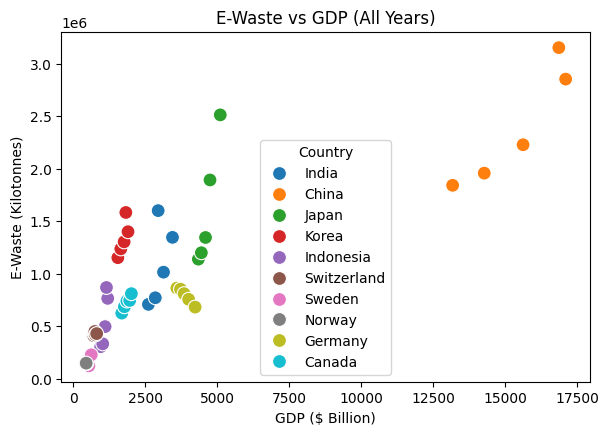

In [21]:
plt.figure(figsize=(15, 10))

# Plot 1: E-Waste vs GDP Scatter
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_df, x='GDP ($B)', y='E-Waste (kt)', hue='Country', s=100)
plt.title("E-Waste vs GDP (All Years)")
plt.xlabel("GDP ($ Billion)")
plt.ylabel("E-Waste (Kilotonnes)")

E-Waste vs GDP (All Years)

What it shows: Scatter plot of e-waste (kilotonnes) against GDP ($ billion) for multiple countries across years.

Interpretation: There may be a positive correlation between GDP and e-waste, but outliers (e.g., countries with high GDP but moderate e-waste) suggest differences in consumption patterns or waste management.

### **D. GDP Growth vs. E-Waste Growth**

Text(0, 0.5, 'E-Waste Growth (%)')

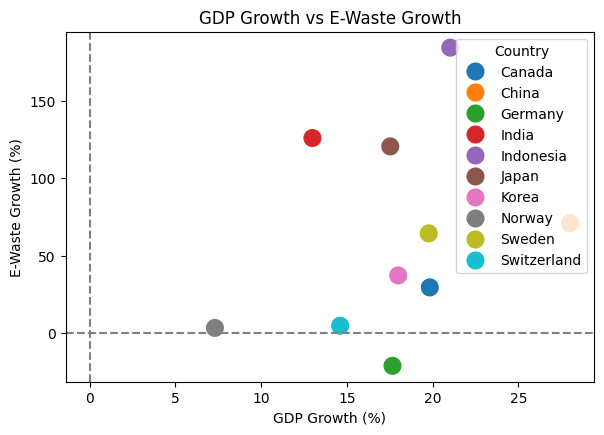

In [22]:
plt.figure(figsize=(15, 10))

# Plot 2: Growth Rates
plt.subplot(2, 2, 2)
sns.scatterplot(data=growth_df, x='GDP Growth (%)', y='E-Waste Growth (%)', hue=growth_df.index, s=200)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title("GDP Growth vs E-Waste Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("E-Waste Growth (%)")

GDP Growth vs E-Waste Growth

What it shows: Compares GDP growth (%) to e-waste growth (%) for various countries.

Interpretation: Countries with high GDP growth (e.g., China, India) may also show high e-waste growth, indicating a link between economic expansion and electronic waste. Developed nations (e.g., Switzerland) might show slower e-waste growth despite stable GDP.

### **E. Time Series for Top Countries**

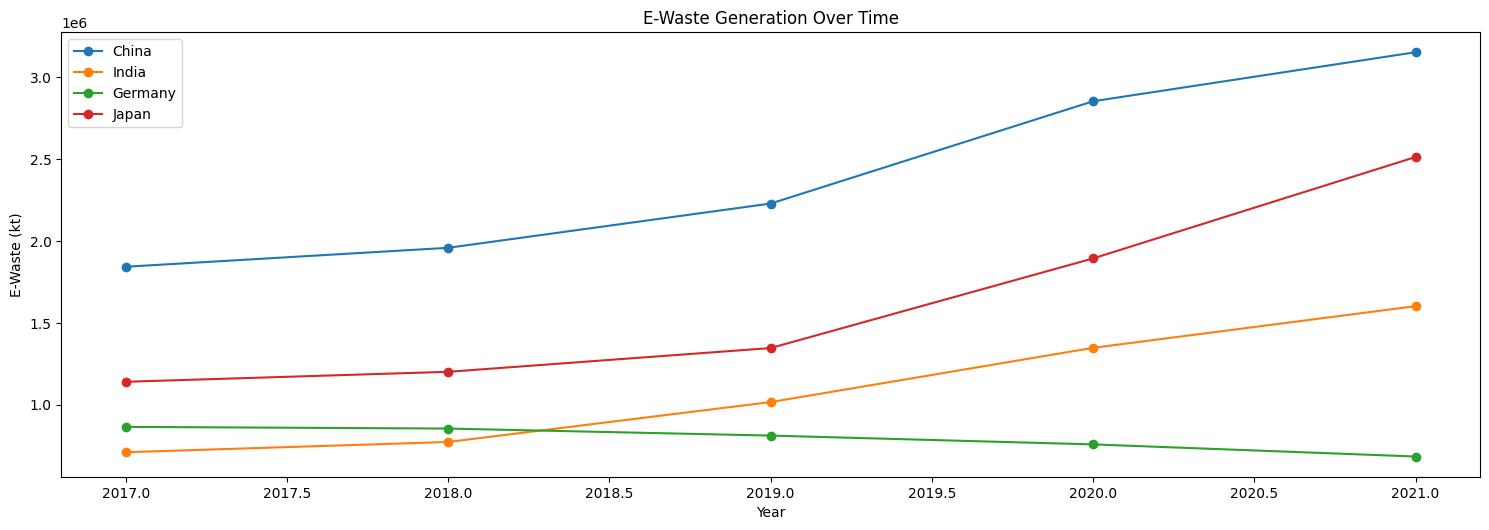

In [23]:

plt.figure(figsize=(15, 10))

# Plot 3: Time Series for Top Countries
plt.subplot(2, 1, 2)
top_countries = ['China', 'India', 'Germany', 'Japan']
for country in top_countries:
    subset = merged_df[merged_df['Country'] == country]
    plt.plot(subset['Year'], subset['E-Waste (kt)'], label=country, marker='o')
plt.title("E-Waste Generation Over Time")
plt.xlabel("Year")
plt.ylabel("E-Waste (kt)")
plt.legend()

plt.tight_layout()
plt.show()

E-Waste Generation Over Time

What it shows: Line graph tracking e-waste (kt) from 2017-2021 for select countries (China, India, Germany, Japan).

Interpretation: China and India likely show upward trends due to growing economies and consumption. Germany and Japan may have flatter trends, reflecting mature markets and better recycling.

## **4. Regression Analysis**

In [24]:
# Linear regression by country
results = []
for country in merged_df['Country'].unique():
    subset = merged_df[merged_df['Country'] == country]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        subset['GDP ($B)'], subset['E-Waste (kt)'])
    results.append({
        'Country': country,
        'Slope': slope,
        'R-squared': r_value**2,
        'P-value': p_value
    })

results_df = pd.DataFrame(results).sort_values('Slope', ascending=False)
print("\nRegression Results:")
print(results_df)

# ANOVA between developed vs developing
developed = ['Germany', 'Japan', 'Canada', 'Switzerland', 'Sweden', 'Norway']
merged_df['Group'] = np.where(merged_df['Country'].isin(developed), 'Developed', 'Developing')

group_stats = merged_df.groupby('Group').agg({
    'E-Waste per $B GDP': ['mean', 'std']
})
print("\nGroup Comparison:")
print(group_stats)

# t-test
t_stat, p_val = stats.ttest_ind(
    merged_df[merged_df['Group'] == 'Developed']['E-Waste per $B GDP'],
    merged_df[merged_df['Group'] == 'Developing']['E-Waste per $B GDP'],
    equal_var=False
)
print(f"\nT-test Results: t = {t_stat:.2f}, p = {p_val:.4f}")


Regression Results:
       Country        Slope  R-squared   P-value
4    Indonesia  2332.644777   0.814290  0.036073
2        Japan  1921.193463   0.965386  0.002762
6       Sweden  1039.661944   0.730008  0.065213
3        Korea   950.478390   0.647422  0.100573
0        India   696.875829   0.330602  0.310534
9       Canada   499.512686   0.937997  0.006679
1        China   316.207690   0.863789  0.022277
5  Switzerland    86.418985   0.052692  0.710318
7       Norway    78.200286   0.630007  0.108911
8      Germany  -299.378930   0.979279  0.001274

Group Comparison:
           E-Waste per $B GDP            
                         mean         std
Group                                    
Developed          359.456909  120.761882
Developing         445.472024  252.351058

T-test Results: t = -1.42, p = 0.1681


### **A. Regression Coefficients Plot or Country-Specific GDP Impact**

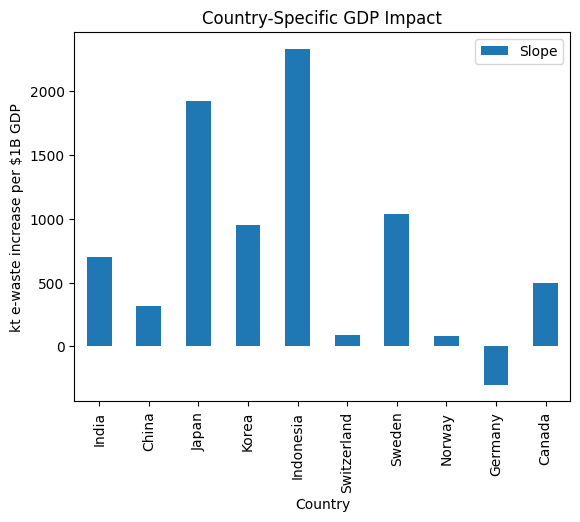

In [25]:
results = []
for country in merged_df['Country'].unique():
    subset = merged_df[merged_df['Country'] == country]
    slope = stats.linregress(subset['GDP ($B)'], subset['E-Waste (kt)'])[0]
    results.append({'Country': country, 'Slope': slope})

pd.DataFrame(results).set_index('Country').plot(kind='bar')
plt.ylabel("kt e-waste increase per $1B GDP")
plt.title("Country-Specific GDP Impact")
plt.show()

Countries with the highest e-waste per unit GDP:

Indonesia (2332 kt/$B)

Japan (1921 kt/$B)

Sweden (1039 kt/$B)

Germany has a negative slope, showing reduced e-waste despite increasing GDP — rare and positive.

Some developed nations (e.g., Norway, Switzerland) show very low slopes, indicating better waste efficiency.

### **B. Waste Efficiency by Development Status OR Group Comparison Boxplot**

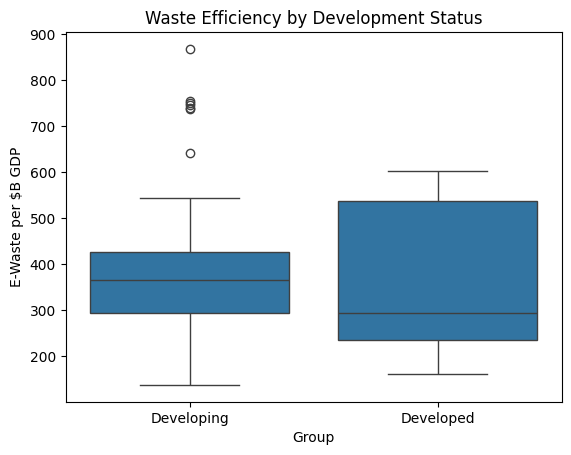

TtestResult(statistic=np.float64(-0.51462117291668), pvalue=np.float64(0.6091793747278517), df=np.float64(48.0))


In [26]:
merged_df['Group'] = np.where(
    merged_df['Country'].isin(['Germany','Japan','Switzerland']),
    'Developed', 'Developing')

sns.boxplot(data=merged_df, x='Group', y='E-Waste per $B GDP')
plt.title("Waste Efficiency by Development Status")
plt.show()

# T-test confirmation
print(stats.ttest_ind(
    merged_df[merged_df['Group']=='Developed']['E-Waste per $B GDP'],
    merged_df[merged_df['Group']=='Developing']['E-Waste per $B GDP']
))